In [98]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import math
from scipy.stats import linregress as lreg

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth']=1

def pfo(t, a, b):
    pfo.has_been_called = True
    return a*(1 - np.exp(-b*t))

def pso(x, a, b):
    pso.has_been_called = True
    return ((a*(b**2))*x)/(1 + (a*b)*x)

def elovich(x, a, b):
    elovich.has_been_called = True
    return (1/b)*np.log(1 + a*b*x)

def sips(x, a, b, c):
    sips.has_been_called = True
    return a*(b*x)**(1/c)/(1+ (b*x)**(1/c))

def temkin(x, a, b):
    temkin.has_been_called = True
    return b*np.log(a*x)

def dubinin_r(x, a, b):
    dubinin_r.has_been_called = True
    T = 298
    R = 8.314
    return a*np.exp(-b*(np.log((1+(1/x))))**2)

def residual(y,y_pred):
    res = y - y_pred
    
    if Kn_model == toth or Kn_model == sips:
        residual_s = np.sqrt(np.sum(np.square(res))/(len(res)-3))
        
    residual_s = np.sqrt(np.sum(np.square(res))/(len(res)-2))    
    residual = [(res[i] - np.mean(res)/residual_s) for i in range(len(res))]
    residual = np.around(residual, decimals=3, out=None)
    return res, residual, residual_s

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = lreg(x, y)
    return r_value**2

pfo.has_been_called = False
pso.has_been_called = False
elovich.has_been_called = False
sips.has_been_called = False
temkin.has_been_called = False
dubinin_r.has_been_called = False

x = [61.60,118.84,178.81,237.37,299.17,414.08,540.83]
y = [7.77,10.02,11.45,13.09,13.91,14.32,14.32]
x_m = np.linspace(start=0, stop=np.max(x), num=100)
y_axis_max = np.zeros(6)

The PSO coefficients are K_2 = 0.00081 ± 0.00011 and q_e = 16.746 ± 0.473


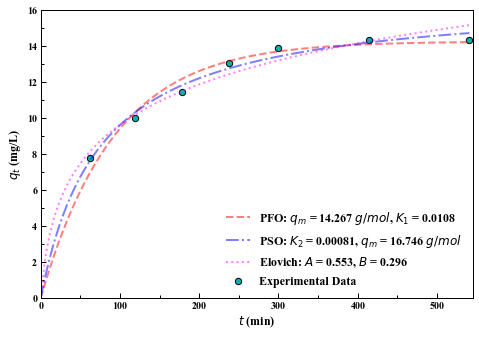

In [127]:
Kn_model = pso

#calculating the isotherm parameters
if Kn_model == pfo:
    #pars_pf, cov_pf = curve_fit(Kn_model,x, y, p0 = [15,0.05],method = 'trf')
    pars_pf, cov_pf = curve_fit(Kn_model,x, y, p0 = [10,0.1],method = 'trf')
    stdevs_pf = np.sqrt(np.diag(cov_pf))
    y_m_pf = np.transpose([Kn_model(i,pars_pf[0], pars_pf[1]) for i in x_m])
    y_axis_max[0] = np.max(y_m_pf)
    y_pred_pf = np.transpose([Kn_model(i,pars_pf[0], pars_pf[1]) for i in x])
    r2_pf = rsquared(y,y_pred_pf)
    res_pf, residual_pf, residual_s_pf = residual(y,y_pred_pf)
    print('The PFO coefficients are q_e = %.3f \u00B1 %.3f and K_1 = %.3f \u00B1 %.3f' % (pars_pf[0],stdevs_pf[0],pars_pf[1],stdevs_pf[1]))

elif Kn_model == pso:
    #pars_ps, cov_ps = curve_fit(Kn_model,x, y, p0 = [0.001,15],method = 'trf')
    pars_ps, cov_ps = curve_fit(Kn_model,x, y, p0 = [0.005,10])
    stdevs_ps = np.sqrt(np.diag(cov_ps))
    y_m_ps = np.transpose([Kn_model(i,pars_ps[0], pars_ps[1]) for i in x_m])
    y_axis_max[1] = np.max(y_m_ps)
    y_pred_ps = np.transpose([Kn_model(i,pars_ps[0], pars_ps[1]) for i in x])
    r2_ps = rsquared(y,y_pred_ps)
    res_ps, residual_ps, residual_s_ps = residual(y,y_pred_ps)
    print('The PSO coefficients are K_2 = %.5f \u00B1 %.5f and q_e = %.3f \u00B1 %.3f' % (pars_ps[0],stdevs_ps[0],pars_ps[1],stdevs_ps[1]))

elif Kn_model == elovich:
    pars_E, cov_E = curve_fit(Kn_model,x, y, p0 = [1,1],method = 'trf')
    stdevs_E = np.sqrt(np.diag(cov_E))
    y_m_E = np.transpose([Kn_model(i,pars_E[0], pars_E[1]) for i in x_m])
    y_pred_E = np.transpose([Kn_model(i,pars_E[0], pars_E[1]) for i in x])
    r2_E = rsquared(y,y_pred_E)
    res_E, residual_E, residual_s_E = residual(y,y_pred_E)
    print('The Elovich coefficients are A = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_E[0],stdevs_E[0],pars_E[1],stdevs_E[1]))    
    
elif Kn_model == sips:
    pars_S, cov_S = curve_fit(Kn_model,x, y, p0 = [1,1,1],method = 'trf')
    stdevs_S = np.sqrt(np.diag(cov_S))
    y_m_S = np.transpose([Kn_model(i,pars_S[0], pars_S[1], pars_S[2]) for i in x_m])
    y_pred_S = np.transpose([Kn_model(i,pars_S[0], pars_S[1], pars_S[2]) for i in x])
    r2_S = rsquared(y,y_pred_S)
    res_S, residual_S, residual_s_Sp = residual(y,y_pred_S)
    print('The Sips coefficients are q_m = %.3f \u00B1 %.3f, K_S = %.3f \u00B1 %.3f and n = %.3f \u00B1 %.3f' % (pars_S[0],stdevs_S[0],pars_S[1],stdevs_S[1], pars_S[2],stdevs_S[2]))    

elif Kn_model == temkin:
    pars_TM, cov_TM = curve_fit(Kn_model,x, y, p0 = [1,1],method = 'trf')
    stdevs_TM = np.sqrt(np.diag(cov_TM))
    y_m_TM = np.transpose([Kn_model(i,pars_TM[0], pars_TM[1]) for i in x_m])
    y_pred_TM = np.transpose([Kn_model(i,pars_TM[0], pars_TM[1]) for i in x])
    r2_TM = rsquared(y,y_pred_TM)
    res_TM, residual_TM, residual_s_TM = residual(y,y_pred_TM)
    print('The Temkin coefficients are K_TH = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_TM[0],stdevs_TM[0],pars_TM[1],stdevs_TM[1]))   

elif Kn_model == dubinin_r:
    pars_DR, cov_DR = curve_fit(Kn_model,x, y, p0 = [1,1], method = 'trf')
    stdevs_DR = np.sqrt(np.diag(cov_DR))
    y_m_DR = np.transpose([Kn_model(i,pars_DR[0], pars_DR[1]) for i in x_m])
    y_pred_DR = np.transpose([Kn_model(i,pars_DR[0], pars_DR[1]) for i in x])
    r2_DR = rsquared(y,y_pred_DR)
    res_DR, residual_DR, residual_s_DR = residual(y,y_pred_DR)
    print('The D-R coefficients are q_m = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_DR[0],stdevs_DR[0],pars_DR[1],stdevs_DR[1]))   

#plotting graphs corresponding to the isotherms
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.scatter(x, y, s=40, color='#00b3b3', label='Experimental Data', edgecolor = 'black')
ax.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax.set_xlim([0, math.ceil(np.max(x)/ 5.0) * 5])

#determine the y_limit
if np.max(y_axis_max) < np.max(y):
    max_y = np.max(y)
else:
    max_y = np.max(y_axis_max) 
    
ax.set_ylim([0, math.ceil(np.max(max_y)/ 2.0) * 2])

#plotting
if pfo.has_been_called:
    ax.plot(x_m, y_m_pf, linestyle='--', linewidth=2, color='red', label='PFO: $q_{m}$ = %5.3f $g/mol$, $K_{1}$ = %5.4f' % tuple(pars_pf), alpha =0.5)

if pso.has_been_called:
    ax.plot(x_m, y_m_ps, linestyle='-.', linewidth=2, color='blue', label='PSO: $K_{2}$ = %5.5f, $q_{m}$ = %5.3f $g/mol$' % tuple(pars_ps), alpha =0.5)

if elovich.has_been_called:
    ax.plot(x_m, y_m_E, linestyle=':', linewidth=2, color='magenta', label='Elovich: $A$ = %5.3f, $B$ = %5.3f' % tuple(pars_E), alpha =0.5)

if sips.has_been_called:
    ax.plot(x_m, y_m_S, dashes=[4, 1, 1, 1], linewidth=2, color='g', label='Sips: $q_{m}$ = %5.3f $g/mol$, $K_{S}$ = %5.3f, n = %.2f' % tuple(pars_S), alpha =0.5)

if temkin.has_been_called:
    ax.plot(x_m, y_m_TM, dashes=[5, 5, 3, 2], linewidth=2, color='grey', label='Temkin: $K_{TM}$ = %.2f $g/mol$, $B$ = %.2f' % tuple(pars_TM), alpha =0.5)

if dubinin_r.has_been_called:
    ax.plot(x_m, y_m_DR, dashes=[3, 1, 3, 1], linewidth=2, color='darkred', label='D-R: $q_{m}$ = %.2f $g/mol$ and $B$ = %5.7f' % tuple(pars_DR), alpha =0.5)

ax.set_xlabel('$t$ (min)', fontsize = 12)
ax.set_ylabel('$q_{t}$ (mg/L)', fontsize = 12)
plt.legend(loc = 4,frameon=False,fontsize=12)
fig.savefig('Kinetics/kinetic_models.pdf',bbox_inches='tight', dpi = 1200)

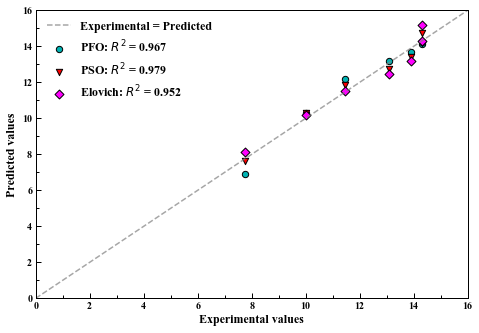

In [128]:
#Comparison of the model values with the experimental values
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.plot([0,math.ceil(np.max(y)/ 2.0) * 2],[0,math.ceil(np.max(y)/ 2.0) * 2], color='grey', linestyle='dashed', label = 'Experimental = Predicted', alpha = 0.7)

if pfo.has_been_called:
    ax2.scatter(y, y_pred_pf, s=40, color='#00b3b3', label='PFO: $R^{2}$ = %.3f' %r2_pf, edgecolor = 'black')

if pso.has_been_called:
    ax2.scatter(y, y_pred_ps, s=40, color='red', label='PSO: $R^{2}$ = %.3f' %r2_ps, marker = 'v', edgecolor = 'black')

if elovich.has_been_called:
    ax2.scatter(y, y_pred_E, s=40, color='magenta', label='Elovich: $R^{2}$ = %.3f' %r2_E, marker = 'D', edgecolor = 'black')
    
if sips.has_been_called:
    ax2.scatter(y, y_pred_S, s=40, color='g', label='Sips: $R^{2}$ = %.3f' %r2_S, marker = 'X', edgecolor = 'black')

if temkin.has_been_called:
    ax2.scatter(y, y_pred_TM, s=40, color='grey', label='Temkin: $R^{2}$ = %.3f' %r2_TM, marker = 's', edgecolor = 'black')
    
if dubinin_r.has_been_called:
    ax2.scatter(y, y_pred_DR, s=40, color='darkred', label='D-R: $R^{2}$ = %.3f' %r2_DR, marker = '*', edgecolor = 'black')
    
ax2.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax2.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax2.set_xlim([0, math.ceil(np.max(y)/ 2.0) * 2])
ax2.set_ylim([0, math.ceil(np.max(max_y)/ 2.0) * 2])

ax2.set_xlabel('Experimental values', fontsize = 12)
ax2.set_ylabel('Predicted values', fontsize = 12)
ax2.legend(loc=2, frameon=False, fontsize=12)
fig2.savefig('Kinetics/accuracy.pdf',bbox_inches='tight', dpi = 1200)

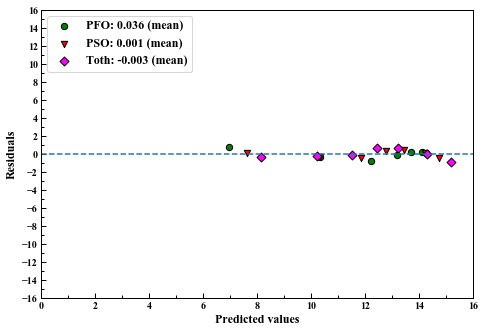

In [129]:
#Residual analysis
fig3 = plt.figure()
ax3 = fig3.add_axes([0, 0, 1, 1])
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.xaxis.set_major_locator(MultipleLocator(2))
ax3.yaxis.set_minor_locator(MultipleLocator(1))
ax3.yaxis.set_major_locator(MultipleLocator(2))

if pfo.has_been_called:
    ax3.scatter(y_pred_pf, res_pf, s=40, color='g', label='PFO: %.3f (mean)' %np.mean(res_pf), edgecolor = 'black')
    
if pso.has_been_called:
    ax3.scatter(y_pred_ps, res_ps, s=40, color='red', label='PSO: %.3f (mean)' %np.mean(res_ps), marker = 'v', edgecolor = 'black')

if elovich.has_been_called:
    ax3.scatter(y_pred_E, res_E, s=40, color='magenta', label='Toth: %.3f (mean)' %np.mean(res_E), marker = 'D', edgecolor = 'black')
    
if sips.has_been_called:
    ax3.scatter(y_pred_S, res_S, s=40, color='g', label='Sips: %.3f (mean)' %np.mean(res_S), marker = 'X', edgecolor = 'black')

if temkin.has_been_called:
    ax3.scatter(y_pred_TM, res_TM, s=40, color='grey', label='Temkin: %.3f (mean)' %np.mean(res_TM), marker = 's', edgecolor = 'black')

if dubinin_r.has_been_called:
    ax3.scatter(y_pred_DR, res_DR, s=40, color='darkred', label='D-R: %.3f (mean)' %np.mean(res_DR), marker = '*', edgecolor = 'black')

ax3.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax3.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax3.set_xlim([0, math.ceil(np.max(max_y)/ 2.0) * 2])
ax3.set_ylim([math.ceil(np.max(max_y)/ 2.0) * -2, math.ceil(np.max(max_y)/ 2.0) * 2])
ax3.plot([0,math.ceil(np.max(x)/ 2.0) * 2],[0,0], linestyle='dashed')
ax3.set_xlabel('Predicted values', fontsize = 12)
ax3.set_ylabel('Residuals', fontsize = 12)
plt.legend(frameon=True, loc=2, fontsize = 12)
fig3.savefig('Kinetics/residuals.pdf',bbox_inches='tight', dpi = 1200)

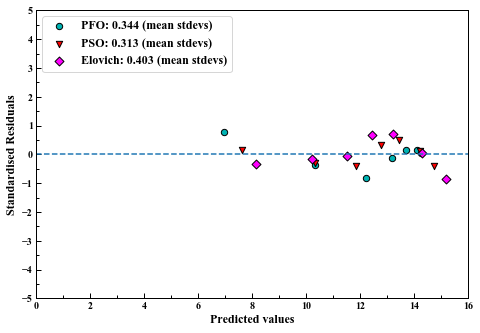

In [130]:
#Standardised residual analysis
fig4 = plt.figure()
ax4 = fig4.add_axes([0, 0, 1, 1])
ax4.xaxis.set_minor_locator(MultipleLocator(1))
ax4.xaxis.set_major_locator(MultipleLocator(2))
ax4.yaxis.set_minor_locator(MultipleLocator(0.5))
ax4.yaxis.set_major_locator(MultipleLocator(1))

if pfo.has_been_called:
    ax4.scatter(y_pred_pf, residual_pf, s=40, color='#00b3b3', label='PFO: %.3f (mean stdevs)' %np.mean(np.abs(residual_pf)), edgecolor = 'black')
    
if pso.has_been_called:
    ax4.scatter(y_pred_ps, residual_ps, s=40, color='red', label='PSO: %.3f (mean stdevs)' %np.mean(np.abs(residual_ps)), marker = 'v', edgecolor = 'black')

if elovich.has_been_called:
    ax4.scatter(y_pred_E, residual_E, s=40, color='magenta', label='Elovich: %.3f (mean stdevs)' %np.mean(np.abs(residual_E)), marker = 'D', edgecolor = 'black')

if sips.has_been_called:
    ax4.scatter(y_pred_S, residual_S, s=40, color='g', label='Sips: %.3f (mean stdevs)' %np.mean(np.abs(residual_S)), marker = 'X', edgecolor = 'black')    

if temkin.has_been_called:
    ax4.scatter(y_pred_TM, residual_TM, s=40, color='grey', label='Temkin: %.3f (mean stdevs)' %np.mean(np.abs(residual_TM)), marker = 's', edgecolor = 'black')    

if dubinin_r.has_been_called:
    ax4.scatter(y_pred_DR, residual_DR, s=40, color='darkred', label='D-R: %.3f (mean stdevs)' %np.mean(np.abs(residual_DR)), marker = '*', edgecolor = 'black')    

ax4.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax4.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax4.set_xlim([0, math.ceil(np.max(max_y)/ 2.0) * 2])
ax4.set_ylim([-5, 5])
ax4.plot([0,math.ceil(np.max(max_y)/ 2.0) * 2],[0,0], linestyle='dashed')
#ax4.plot([0,math.ceil(np.max(y_pred_F)/ 2.0) * 2],[3,3], linestyle='dashed', color = 'red')
#ax4.plot([0,math.ceil(np.max(y_pred_F)/ 2.0) * 2],[-3,-3], linestyle='dashed', color = 'red', label = 'Acceptable region')
ax4.set_xlabel('Predicted values', fontsize = 12)
ax4.set_ylabel('Standardised Residuals', fontsize = 12)
plt.legend(frameon=True, loc=2, fontsize = 12)
fig4.savefig('Kinetics/residuals_standardised.pdf',bbox_inches='tight', dpi = 1200)